### Neural Networks with PyTorch
Deep learning networks has more number of hidden layers and hence the term "deep" learning. You can build one of these deep neural networks using only weights matrices. 
Pytorch has a very nice module nn that gives a nice way to efficiently build large neural networks

In [119]:
## import all necessary packages
import torch
import numpy as np
import helper
import matplotlib.pyplot as plt

## helper functionality
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()



In [104]:
# In this chapter We are going to build a fully connected network larged than the one we did
# Identifying text in an image, in this one we will identify the letters in an image(grayscale) which consists of handwritten 
# digits. Each image is 28 x 28 pixels

### Goal - Identify the digits in the image using a neural network. 

First we need the data set to work with. In this case we are going to use MNIST dataset through torchvision package. 

In [105]:
### run this cell

from torchvision import datasets, transforms

# Define a transfrom to normalize the data
transform = transforms.Compose([transforms.ToTensor(), 
                               transforms.Normalize((0.5,), (0.5,)),
                               ])
trainset = datasets.MNIST('~/.PyTorchChallenge/MNIST_data/', train=True, transform=transform, download=True)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

print("Success")

Success


Trainset is responsible for downloading the data set from the internet with the above transform which means datas are normalize with mean of 0.5 and standard deviation of 0.5

Trainloader loads the images from the dataset with a batch size of 64 and shuffled. Batch size is the number of images we get in one iteration from the dataloader and pass through our network. when shuffle is set to true - Means the the batch shuffle with each iterations. 

In [106]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


Display one of the images

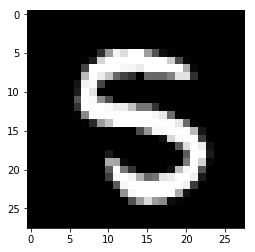

In [107]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

Example - Lets try to build a simple network for this dataset using weight matrices and matrix multiplications.
1. Input to each layer must be one dimensional vector that can be stacked into a 2D tensor as a batch of multiple examples.
2. Images are 28 x 28 2D tensors, so we need to convert them into 1D vectors i.e flatten them.
3. Convert the batches of images with shape(64, 1, 28, 28) to have a shape of(64, 784) 784 means  28 times 28 which is the image size basically flattening them into 1D vectors
4. Here we need 10 output units meaning one for each digit.  We want our network to predict the digit shown in an image. 
5. We will calculate probabilities that the image is any one digit or calss. 
6. This ends up being a discrete probability distribution over the classes or digits that tells us the most likely class for the image. 
7. In summary we need 10 output units for the 10 classes.


In [108]:
## solution to finding the output
# first i have to get the images
# images are flattened with the below command
def activation(x):
    return 1/(1 + torch.exp(-x))

## 2 methods to do that
#inputs = images.reshape(images.shape[0] * images.shape[1], images.shape[2] * images.shape[3])

inputs = images.view(images.shape[0], -1)

w1 = torch.randn(784, 256)
w2 = torch.randn(256, 10)

b1 = torch.randn(256)
b2 = torch.randn(10)

hidden = activation(torch.mm(inputs, w1) + b1)
output = activation(torch.mm(output1, w2) + b2)

print("success")

success


### Now we have to define the probabilities 
We have 10 outputs for our network. We will pass in an image into the network and get out a probability distribution over the classes that tells us the likely classes the images belong to.

In [109]:
# define softmax distribution
# note - about view -- (-1,1) ==> . column shapes is defined by 1 but -1 is automatically decided by the numerator term
def softmax(x):
    den_sum = torch.sum(torch.exp(x), dim=1).view(-1, 1)
    
    return torch.exp(x)/(den_sum)

probabilities = softmax(output)
print(probabilities.shape)
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


### Building networks with Pytorch

Pytorch provides a module nn that makes building networks much simpler. 

In [110]:
from torch import nn

In [111]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        
        # Output Layer, 10 units - One for each digit
        self.output = nn.Linear(256, 10)
        
        # define sigmoid activation and softmax output
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim = 1)
    
    def forward(self, x):
        # Pass the input tensor throught each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x
print("Success")

Success


In [112]:
## Notes to the prior code implementation
# class Network(nn.module):
# Here we are inheriting from nn.module. Combined with super().__init__() this creates
# a class that tracks the architecture and provides a lot of useful methods and attributes. 
# It is mandatory to inherit from nn.module when you are creating a class for your network

# self.hidden = nn.Linear(784, 256)
# It creates a module for a Linear transformation, xW + b with the mentioned params and assigns it to self.hidden
# this method automatically creates the weights and bias tensors which we will use
# in the forward method. 
# we can still access the Weights and Bias tensors once the network is created with net.hidden.weight and net.hidden.bias
# similarly
# self.output = nn.Linear(256, 10)

# setting dim =1 in nn.Softmax(dim = 1) calculates softmax across columns
print("Success")

Success


### Pytorch networks created with nn.module must have a forward method defined. It takes in a tensor x and passes it through the operations defined in the init method

In [113]:
# Create the network and look at its text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

We can define network more concisely and clearly using torch.nn.functional module. 

In [114]:
import torch.nn.functional as F
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        
    def forward(self,x):
        # hidden layer with sigmoid function
        x = F.sigmoid(self.hidden(x))
        # output layer with softnax activation
        x = F.softmax(self.output(x), dim = 1)
        return x
    
print("success")

success


Its not necessarily needed to use softmax for activation function. The only requirement is that for a network to approximate a non linear function, the activation functions must be non limear. 

In [115]:
# solution
class Network(nn.Module):
    def __init__(self):
        super().__init__() ## for tracking these layers
        self.hidden1 = nn.Linear(784, 128)
        self.hidden2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10)
    
    def forward(self, x):
        x = self.hidden1(x)
        x = F.relu(x)
        x = self.hidden2(x)
        x = F.relu(x)
        x = self.output(x)
        x = F.softmax(x, dim = 1)
        
        return x
model = Network()
model

Network(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [116]:
# Weights and such are automatically initialized. 
# below are the ways through which we can access the values
print(model.hidden1.weight)
print(model.hidden1.bias)

Parameter containing:
tensor([[-0.0353,  0.0185, -0.0312,  ...,  0.0098, -0.0161,  0.0006],
        [ 0.0024, -0.0043, -0.0156,  ..., -0.0161,  0.0069, -0.0098],
        [ 0.0282,  0.0282, -0.0235,  ...,  0.0151, -0.0115,  0.0109],
        ...,
        [-0.0214,  0.0047, -0.0021,  ...,  0.0142,  0.0105, -0.0223],
        [ 0.0057,  0.0070, -0.0301,  ..., -0.0231, -0.0189, -0.0099],
        [-0.0347,  0.0259,  0.0088,  ...,  0.0304,  0.0288, -0.0231]],
       requires_grad=True)
Parameter containing:
tensor([-6.5523e-03,  1.7662e-02,  2.1370e-02,  3.1335e-02, -2.1521e-02,
        -5.4332e-03,  2.7082e-02, -1.1717e-02,  2.2495e-02, -2.6022e-02,
         2.2068e-02, -1.0131e-02, -1.6754e-02, -1.1473e-02, -1.2044e-02,
         3.1589e-02, -1.5446e-02,  6.8428e-03,  2.9614e-02, -2.3176e-02,
        -8.0865e-04,  2.0901e-02,  1.8081e-02, -6.9467e-03,  3.4460e-02,
         3.0847e-03,  8.1710e-03, -2.7394e-02, -3.2651e-02, -1.3705e-02,
         3.2626e-02,  2.8949e-02, -3.4762e-02, -2.4655e-0

These are actually autograd Variables, so we need to get back the actual tensors with model.fc1.weight.data. Once we have the tensors, we can fill them with zeros (for biases) or random normal values.

In [117]:
model.hidden1.bias.data.fill_(0)
model.hidden1.weight.data.normal_(std=0.01)

tensor([[-0.0035,  0.0031,  0.0014,  ...,  0.0109,  0.0117, -0.0106],
        [ 0.0079, -0.0120, -0.0002,  ..., -0.0073, -0.0083, -0.0036],
        [-0.0144,  0.0034,  0.0109,  ..., -0.0099, -0.0069, -0.0008],
        ...,
        [ 0.0018,  0.0104,  0.0060,  ...,  0.0054, -0.0102,  0.0048],
        [-0.0157,  0.0043,  0.0086,  ..., -0.0247,  0.0001, -0.0066],
        [-0.0141,  0.0099, -0.0054,  ..., -0.0094, -0.0023,  0.0121]])

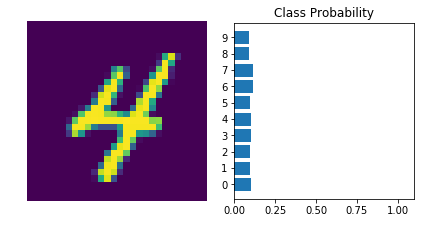

In [121]:
# Now we are ready with the model so we can pass an image and see what happens
detailer = iter(trainloader)
images, labels = detailer.next()

# resize the images into a 1D vector, new shape is (batch size, color channels, image pixels)
images.resize_(64,1,784)

# forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])
img = images[img_idx]
view_classify(img.view(1, 28, 28), ps)

In [ ]:
# since we have not trained the network is not able to identify the digit

### Using nn.Sequential

Pytorch provides a convenient way to build networks like this where a tensor is passed sequentially through operations, nn.sequential

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


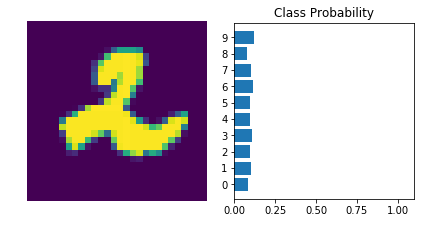

In [124]:
# Hyperparamters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[1], output_size),
                     nn.Softmax(dim = 1)
                     )
print(model)

# forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
view_classify(images[0].view(1,28,28), ps)

In [125]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[-0.0228,  0.0278,  0.0207,  ...,  0.0124, -0.0304, -0.0174],
        [ 0.0152, -0.0040, -0.0277,  ...,  0.0004,  0.0271, -0.0168],
        [ 0.0327, -0.0173, -0.0305,  ..., -0.0351,  0.0076,  0.0164],
        ...,
        [-0.0301,  0.0317, -0.0240,  ...,  0.0067, -0.0160,  0.0151],
        [-0.0339, -0.0131,  0.0235,  ...,  0.0134, -0.0330, -0.0027],
        [ 0.0334, -0.0332,  0.0010,  ...,  0.0165,  0.0003,  0.0139]],
       requires_grad=True)

You can also pass in an OrderedDict to name the individual layers and operations, instead of using incremental integers. Note that dictionary keys must be unique, so each operation must have a different name.

In [127]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)

In [128]:
print(model[0])
print(model.fc1)


Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)
